# Numpy y Problemas de Estadística

- Conceptos básicos de Numpy
- Se verá la media, moda y mediana
- Rank para primeros o últimos n elementos
- Gráficos básicos
- Cálculos de correlación / Heatmaps
- Scatterplots

Numpy es un paquete fundamental para computación científica en Python. Incluye operaciones matriciales, operaciónes de estádistica, simulación aleatoria, etc.


In [2]:
import numpy as np
import pandas as pd
import os

os.chdir('D:/Documentos/Documentos/DataAnalysis/ebac/Python/')

df = pd.read_csv('Modulo14/fifa_eda.csv')
df.sample(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
12133,234000,Sander Asevedo,34,Brazil,63,63,Paraná,150.0,3.0,Right,1.0,1.0,GK,2018,2021-01-01,6.166667,176.0,285.0
12775,169907,S. Miller,30,England,63,63,Crewe Alexandra,350.0,4.0,Right,1.0,2.0,LS,2018,2020-01-01,5.666667,157.0,613.0
15922,231481,T. Vassell,21,England,58,64,Port Vale,150.0,2.0,Right,1.0,2.0,CB,2018,2019-01-01,6.000000,154.0,293.0
6113,205955,B. Montenegro,25,Paraguay,69,74,Club Atlético Talleres,1400.0,9.0,Left,1.0,3.0,ST,2014,2022-01-01,5.833333,174.0,2200.0
13458,183665,B. Prokopič,30,Austria,62,62,SCR Altach,280.0,3.0,Right,1.0,3.0,CM,2013,2021-01-01,5.916667,163.0,406.0


## Operaciones Básicas NumPy
- Información estad´sitcia como Age, Overall and Potential
- El primer paso es transformar los pandas.Series en np.arrays

In [47]:
# Transformar columna Age a np.array
age_np = df['Age'].to_numpy()
height_np = df['Height'].to_numpy()
weight_np = df['Weight'].to_numpy()
overall_np = df['Overall'].to_numpy()
potential_np = df['Potential'].to_numpy()

In [48]:
type(age_np)

numpy.ndarray

In [51]:
age_np[0:10]

array([31, 33, 26, 27, 27, 27, 32, 31, 32, 25], dtype=int64)

In [52]:
# Contar valores diferentes de cero
np.count_nonzero(age_np)

18207

In [53]:
# Operación de condición
np.where(age_np>30, age_np, 999)

array([ 31,  33, 999, ..., 999, 999, 999], dtype=int64)

In [54]:
# Obtener el jugador más viejo
index_oldest = np.argmax(age_np)
age_np[index_oldest]

45

In [55]:
media = age_np.mean()
format_media = "{:.2f}".format(media)
print(f'La media de la edad de los jugadores es {format_media} años')

La media de la edad de los jugadores es 25.12 años


In [56]:
# Percentiles
for i in range (0,100):
    print(f'{i}% :', np.percentile(age_np, i))

0% : 16.0
1% : 17.0
2% : 18.0
3% : 18.0
4% : 18.0
5% : 18.0
6% : 19.0
7% : 19.0
8% : 19.0
9% : 19.0
10% : 19.0
11% : 19.0
12% : 20.0
13% : 20.0
14% : 20.0
15% : 20.0
16% : 20.0
17% : 20.0
18% : 20.0
19% : 21.0
20% : 21.0
21% : 21.0
22% : 21.0
23% : 21.0
24% : 21.0
25% : 21.0
26% : 21.0
27% : 22.0
28% : 22.0
29% : 22.0
30% : 22.0
31% : 22.0
32% : 22.0
33% : 22.0
34% : 23.0
35% : 23.0
36% : 23.0
37% : 23.0
38% : 23.0
39% : 23.0
40% : 23.0
41% : 24.0
42% : 24.0
43% : 24.0
44% : 24.0
45% : 24.0
46% : 24.0
47% : 24.0
48% : 24.0
49% : 25.0
50% : 25.0
51% : 25.0
52% : 25.0
53% : 25.0
54% : 25.0
55% : 25.0
56% : 26.0
57% : 26.0
58% : 26.0
59% : 26.0
60% : 26.0
61% : 26.0
62% : 26.0
63% : 26.0
64% : 27.0
65% : 27.0
66% : 27.0
67% : 27.0
68% : 27.0
69% : 27.0
70% : 28.0
71% : 28.0
72% : 28.0
73% : 28.0
74% : 28.0
75% : 28.0
76% : 29.0
77% : 29.0
78% : 29.0
79% : 29.0
80% : 29.0
81% : 30.0
82% : 30.0
83% : 30.0
84% : 30.0
85% : 30.0
86% : 31.0
87% : 31.0
88% : 31.0
89% : 31.0
90% : 32.0
91% : 32.

In [57]:
# Media, moda y mediana
vals, counts = np.unique(age_np, return_counts=True)    # vals es el array de valores únicos, counts el número de veces que sale cada uno de esos valores
index = np.argmax(counts)       # Busca la cuenta más alta y regresa el índice de esa cuenta
moda  = vals[index]             # Se busca el mismo índice pero en el array de vals puesto que dicho indice de cuentas corresponde al mismo índice de valores
print(f'La moda de edad entre los jugadores es de {moda} años de edad :)')

La moda de edad entre los jugadores es de 21 años de edad :)


In [58]:
# Mediana
mediana = np.median(age_np)
print(f'La mediana de edad entre los jugadores es de {mediana} años de edad')

La mediana de edad entre los jugadores es de 25.0 años de edad


In [59]:
# Desviación estándar
desvstd = age_np.std()
print(f'La desviación estándar de las edades de los jugadores es de {desvstd:.2f}')

La desviación estándar de las edades de los jugadores es de 4.67


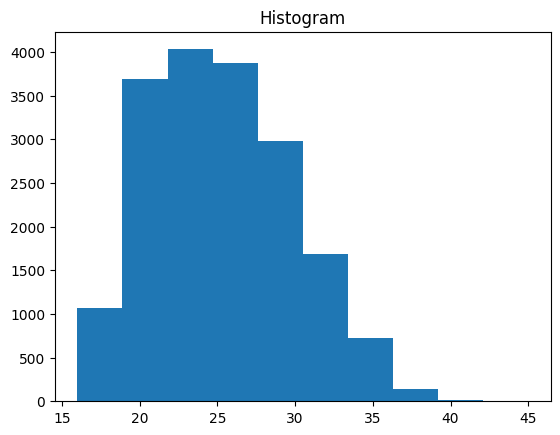

In [60]:
# Gráficos con Numpy
import matplotlib.pyplot as plt
plt.hist(age_np)
plt.title('Histogram')
plt.show()

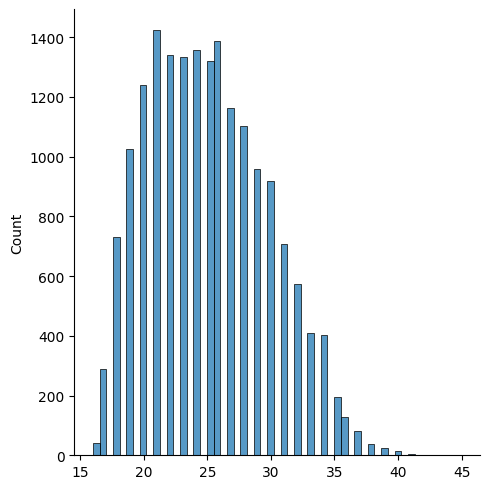

In [61]:
import seaborn as sns
sns.displot(age_np)

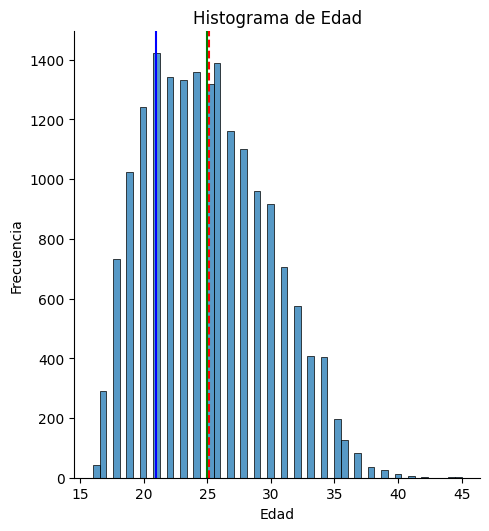

In [62]:
# Añadir la media moda y mediana al gráfico con diferentes colores
sns.displot(age_np)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.axvline(x=age_np.mean(), color='red', ls='--')
plt.axvline(x=np.median(age_np), color='green', ls='-')
plt.axvline(x=moda, color='blue', ls='-')

---
# Ordenamiento y Posición - Numpy

In [63]:
print('Numéro de jugadores:', len(age_np))

Numéro de jugadores: 18207


In [64]:
# Máximo y mínimo
print(f'La edad máxima incluida en la base de datos de jugadores es: {np.amax(age_np)}')
print(f'La edad mínima incluida en la base de datos de jugadores es: {np.amin(age_np)}')


La edad máxima incluida en la base de datos de jugadores es: 45
La edad mínima incluida en la base de datos de jugadores es: 16


In [67]:
# Ejercicio de ordenamiento
# Genera un array con las primeras edades
age_top = np.concatenate([age_np])
age_top_num = np.sort(age_top)      # Array de edades ordenadas de menor a mayor

# Revertir el array de age_top_num
age_top_num_rev = age_top_num[::-1]

In [68]:
# 20 jugadores más viejos
age_top_num_rev[0:20]

array([45, 44, 44, 42, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40], dtype=int64)

In [69]:
df.sort_values(['Age'], ascending=False).head(20)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
4741,140029,O. Pérez,45,Mexico,71,71,Pachuca,160.0,8.0,Right,2.0,1.0,GK,1991,2021-01-01,5.666667,165.0,272.000000
18183,53748,K. Pilkington,44,England,48,48,Cambridge United,NaN,1.0,Right,1.0,1.0,GK,2018,2023-01-01,6.166667,190.0,4585.060806
17726,51963,T. Warner,44,Trinidad & Tobago,53,53,Accrington Stanley,NaN,1.0,Right,1.0,1.0,GK,2018,2019-01-01,6.333333,185.0,4585.060806
10545,140183,S. Narazaki,42,Japan,65,65,Nagoya Grampus,40.0,1.0,Right,2.0,1.0,GK,1999,2021-01-01,6.166667,176.0,50.000000
7225,142998,C. Muñoz,41,Argentina,68,68,CD Universidad de Concepción,60.0,1.0,Right,1.0,1.0,GK,2013,2018-01-01,5.833333,161.0,84.000000
1120,156092,J. Villar,41,Paraguay,77,77,NaN,NaN,0.0,Right,2.0,1.0,GK,2016,NaN,5.916667,187.0,4585.060806
12192,208927,H. Sulaimani,41,Saudi Arabia,63,63,Ohod Club,NaN,3.0,Left,1.0,3.0,LB,2018,2019-01-01,5.666667,154.0,4585.060806
15426,18745,M. Tyler,41,England,59,59,Peterborough United,10.0,1.0,Right,1.0,1.0,GK,2016,2019-01-01,6.000000,183.0,18.000000
4228,3665,B. Nivet,41,France,71,71,ESTAC Troyes,NaN,5.0,Right,2.0,3.0,CAM,2012,2019-01-01,5.833333,165.0,4585.060806
10356,49511,F. Kippe,40,Norway,65,65,Lillestrøm SK,NaN,1.0,Left,1.0,2.0,LCB,2002,2019-01-01,6.333333,214.0,4585.060806


In [70]:
# Gráficos de edades por orden
x = df.sort_values(['Age'], ascending=False).head(10)[['Name', 'Age']]
x

,Name,Age
4741,O. Pérez,45
18183,K. Pilkington,44
17726,T. Warner,44
10545,S. Narazaki,42
7225,C. Muñoz,41
1120,J. Villar,41
12192,H. Sulaimani,41
15426,M. Tyler,41
4228,B. Nivet,41
10356,F. Kippe,40


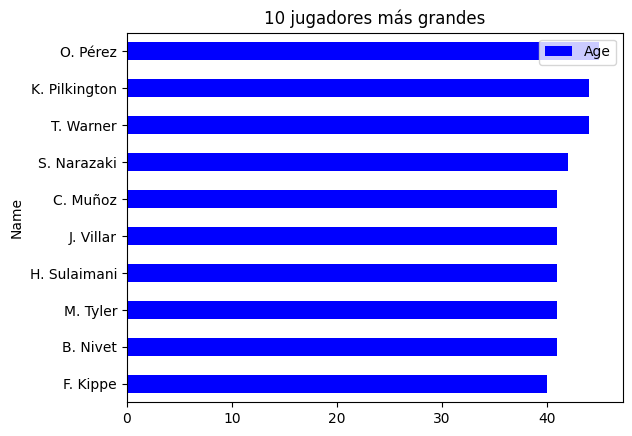

In [71]:
ax = x.iloc[::-1].plot.barh(y='Age', x='Name', color='b', title='10 jugadores más grandes')

## Correlación

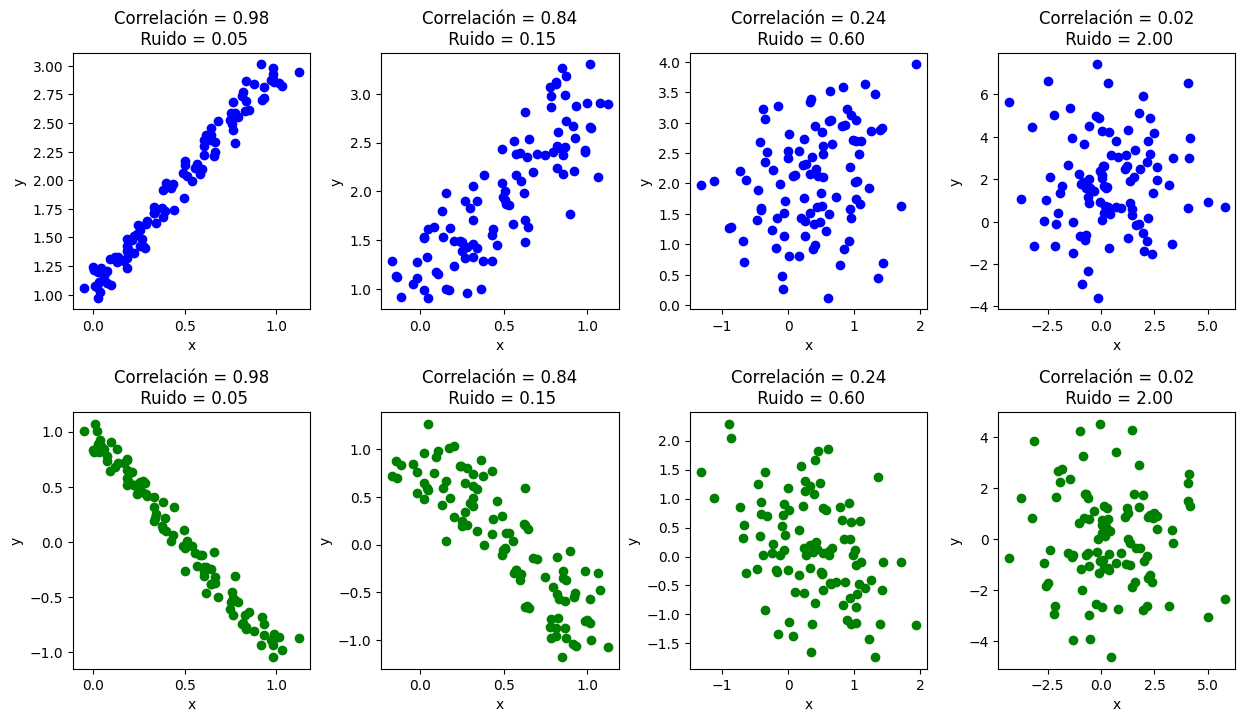

In [72]:
# Gráfico de diferentes correlaciones simultáneas
seed = 13
rand = np.random.RandomState(seed)
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,8))

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x, -x[0,]*2+1))
x = np.vstack ((x, rand.normal(1,3,100)))

for noise, i in zip([.05, .15, .6, 2 ], [0,1,2,3]):
    # Añade ruido
    x_with_noise = x+rand.normal(0,noise,x.shape)

    # Calcular correlación
    rho_noise = np.corrcoef(x_with_noise)

    # Corrlación positiva en la primer alínea y negativa en la segunda
    ax[0,i].scatter(x_with_noise[0,], x_with_noise[1,], color='blue')
    ax[1,i].scatter(x_with_noise[0,], x_with_noise[2,], color='green')
    
    # Set titles
    ax[0,i].title.set_text('Correlación = ' + '{:.2f}'.format(rho_noise[0,1]) + '\n Ruido = ' + '{:.2f}'.format(noise))     # Upper Row
    ax[1,i].title.set_text('Correlación = ' + '{:.2f}'.format(rho_noise[0,1]) + '\n Ruido = ' + '{:.2f}'.format(noise))     # Lower Row

    ax[0,i].set(xlabel='x', ylabel='y')
    ax[1,i].set(xlabel='x', ylabel='y')

fig.subplots_adjust(wspace=.3, hspace=.4)
plt.show()






In [73]:
df.corr(method='pearson', numeric_only=True)       # Corrlación de Rango (posición) DEFAULT

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
ID,1.000000,-0.739208,-0.417025,0.047074,-0.139837,-0.204610,-0.356191,-0.056914,0.206749,-0.090090,-0.191193,-0.121297
Age,-0.739208,1.000000,0.452350,-0.253312,0.078315,0.141145,0.253765,0.027649,-0.202658,0.082506,0.229940,0.058672
Overall,-0.417025,0.452350,1.000000,0.660939,0.631848,0.571926,0.499491,0.414463,-0.169281,0.038527,0.154557,0.597821
Potential,0.047074,-0.253312,0.660939,1.000000,0.579608,0.486413,0.372993,0.354290,-0.047661,-0.009791,-0.006935,0.562346
Value,-0.139837,0.078315,0.631848,0.579608,1.000000,0.858086,0.656158,0.317246,-0.115991,0.002827,0.046702,0.973310
Wage,-0.204610,0.141145,0.571926,0.486413,0.858086,1.000000,0.668635,0.263205,-0.142337,0.019638,0.064764,0.828161
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.656158,0.668635,1.000000,0.208153,-0.133009,0.034881,0.088340,0.620863
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.317246,0.263205,0.208153,1.000000,0.020692,-0.422753,-0.351209,0.297471
Joined,0.206749,-0.202658,-0.169281,-0.047661,-0.115991,-0.142337,-0.133009,0.020692,1.000000,0.001188,-0.028274,-0.115374
Height,-0.090090,0.082506,0.038527,-0.009791,0.002827,0.019638,0.034881,-0.422753,0.001188,1.000000,0.754678,0.001835


In [74]:
df.corr(method='spearman', numeric_only=True)       # Corrlación lineal

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
ID,1.000000,-0.761178,-0.539882,0.024668,-0.354834,-0.420951,-0.346988,-0.129660,0.195429,-0.095951,-0.202187,-0.285664
Age,-0.761178,1.000000,0.483091,-0.263367,0.226417,0.322255,0.265568,0.057824,-0.111394,0.087028,0.229935,0.143103
Overall,-0.539882,0.483091,1.000000,0.625359,0.936782,0.777972,0.436394,0.424411,-0.150620,0.038105,0.147324,0.853812
Potential,0.024668,-0.263367,0.625359,1.000000,0.770111,0.534963,0.320359,0.342562,-0.092179,-0.010427,-0.010877,0.775864
Value,-0.354834,0.226417,0.936782,0.770111,1.000000,0.775787,0.386689,0.502112,-0.124642,-0.010496,0.067579,0.945461
Wage,-0.420951,0.322255,0.777972,0.534963,0.775787,1.000000,0.395627,0.379833,-0.119478,0.017979,0.084259,0.721019
International Reputation,-0.346988,0.265568,0.436394,0.320359,0.386689,0.395627,1.000000,0.187514,-0.097513,0.036089,0.091483,0.367330
Skill Moves,-0.129660,0.057824,0.424411,0.342562,0.502112,0.379833,0.187514,1.000000,-0.003425,-0.422780,-0.345678,0.465190
Joined,0.195429,-0.111394,-0.150620,-0.092179,-0.124642,-0.119478,-0.097513,-0.003425,1.000000,-0.001311,-0.016187,-0.161476
Height,-0.095951,0.087028,0.038105,-0.010427,-0.010496,0.017979,0.036089,-0.422780,-0.001311,1.000000,0.754668,-0.008592


In [75]:
# Corrleación en NumPy
# Puedo ver el coeficiente de correlación entre dos np.arrays
r = np.corrcoef(weight_np, height_np)
r
# weight_np

array([[1.        , 0.75467822],
       [0.75467822, 1.        ]])

<AxesSubplot: >

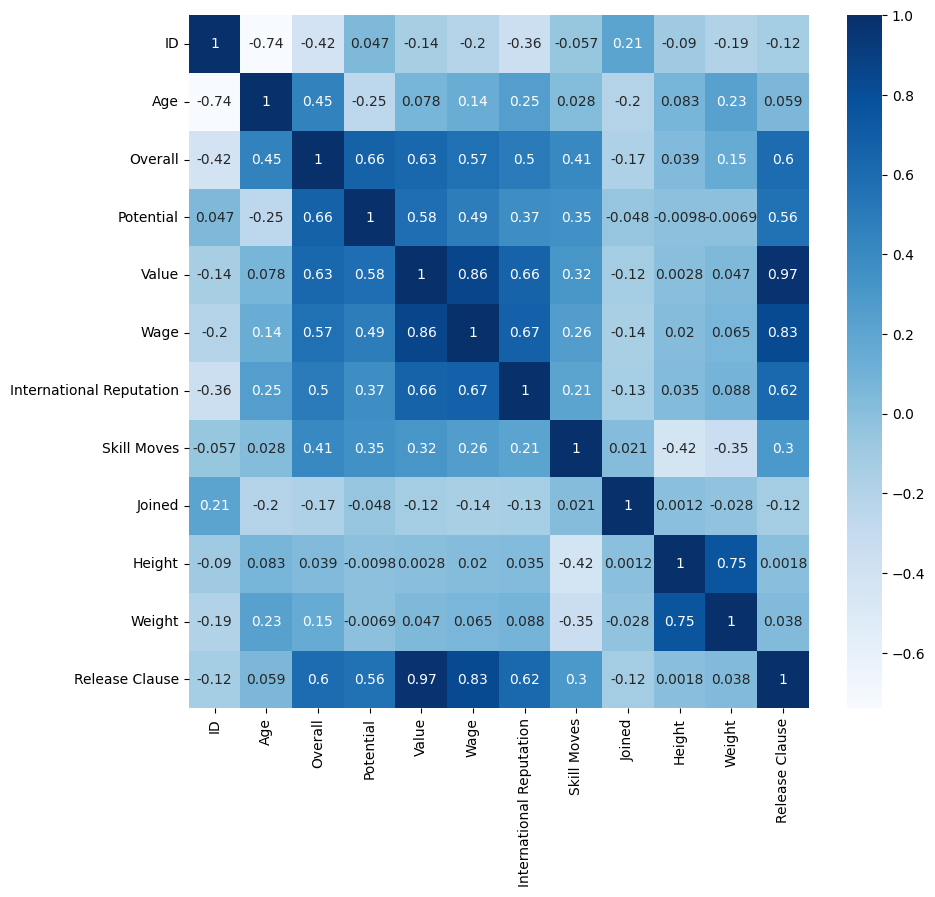

In [80]:
# Visualización de un heatmap de una matriz de correlación
plt.figure(figsize=(10,9))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='Blues', annot=True)

Text(0.5, 1.0, 'Mapa de Calor de Triángulop de Correlación')

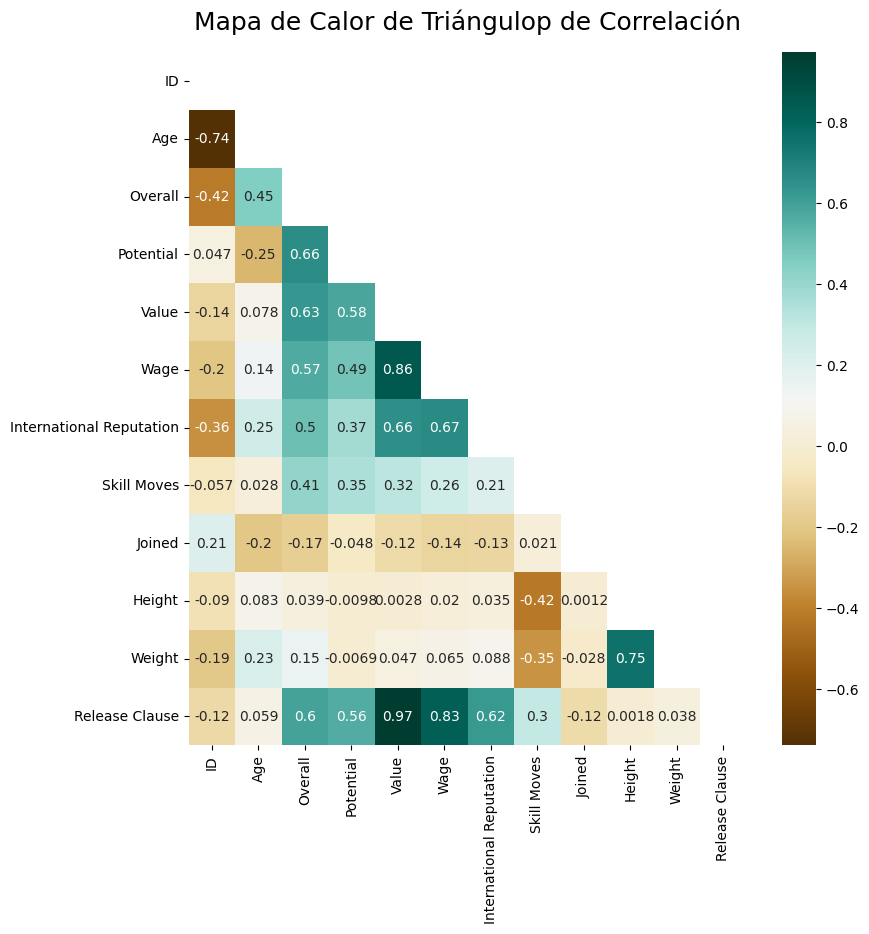

In [87]:
# Gráfico en triangulo
plt.figure(figsize=(9,9))
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))
heatmap = sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de Calor de Triángulop de Correlación', fontdict={'fontsize':18}, pad=16)

### Scatterplots

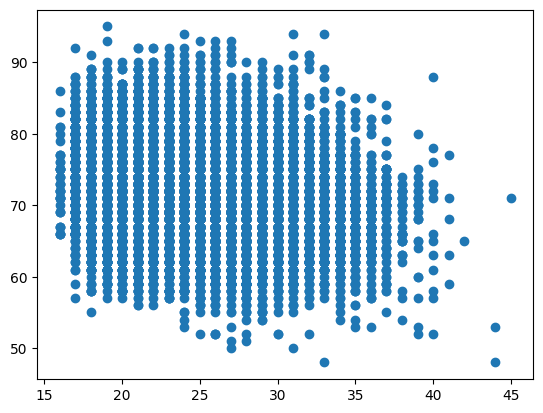

In [89]:
# Gráfico buscando la explicación entre potencial y edad
plt.scatter(x=age_np, y=potential_np)

In [90]:
np.corrcoef(age_np, potential_np)

array([[ 1.        , -0.25331211],
       [-0.25331211,  1.        ]])

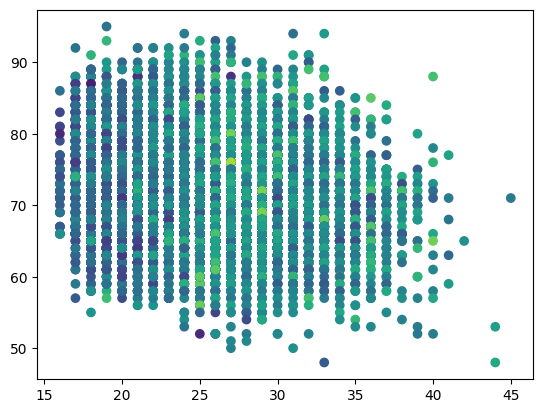

In [92]:
# Scatterplot de tres dimensiones con colores
plt.scatter(x=age_np, y=potential_np, c=weight_np)

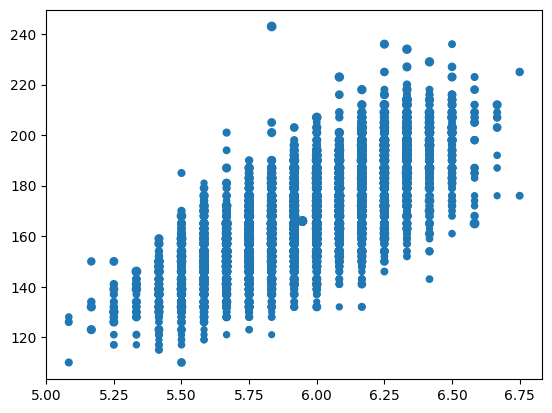

In [94]:
# Scatterplot de tres dimensiones con el área de los puntos
plt.scatter(x=height_np, y=weight_np, s=age_np)
